In [21]:
#Llamar al dataloader
%run DataLoader.ipynb
!pip install nltk
import nltk
from nltk import download
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.gridspec as grd

In [22]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/celeste/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/celeste/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
stopwords_en = stopwords.words('english')

In [24]:
#eliminar puntuación y stopwords
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    words = word_tokenize(text)
    words=[word.lower() for word in words if word.isalpha()]
    tokens = words
    clean_tokens = words

    for token in tokens:
        if token in stopwords_en:
            clean_tokens.remove(token)
            
    return ' '.join(clean_tokens)
    

In [25]:
s = "I can't do this now, because I'm so tired.  Please give me some time. @ sd  4 232"

clean_text(s)

'ca this because so tired please give some time sd'

In [26]:
dataset['Texto limpio']= dataset.text.apply(lambda x: clean_text(x))


In [27]:
dataset

,keyword,location,text,target,longitud,Texto limpio
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69,deeds the reason this earthquake may allah for...
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38,forest fire near la ronge sask canada
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133,residents asked place being notified officers ...
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65,people receive wildfires evacuation orders cal...
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True,83,two giant cranes holding bridge collapse nearb...
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True,125,thetawniest out control wild fires california ...
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True,65,utc of volcano hawaii


In [28]:
dataset['Longitud texto limpio'] = dataset.loc[:,'Texto limpio'].apply(lambda x : len(x))

In [29]:
dataset

,keyword,location,text,target,longitud,Texto limpio,Longitud texto limpio
id,,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69,deeds the reason this earthquake may allah for...,53
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38,forest fire near la ronge sask canada,37
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133,residents asked place being notified officers ...,95
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65,people receive wildfires evacuation orders cal...,53
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,got sent photo ruby alaska smoke wildfires pou...,57
...,...,...,...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True,83,two giant cranes holding bridge collapse nearb...,53
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True,125,thetawniest out control wild fires california ...,88
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True,65,utc of volcano hawaii,21


Text(0.5, 0, 'Longitud de los tweets')

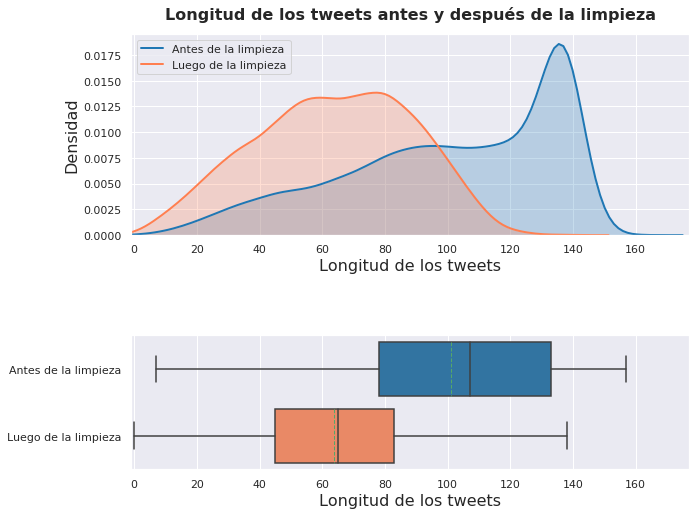

In [31]:
x_lim = dataset['longitud'].max()+20

fig = plt.figure(figsize=(10,8))

gs = grd.GridSpec(2, 1, height_ratios=[6,4], hspace=0.6)


ax = plt.subplot(gs[0])


sns.distplot(dataset['longitud'], hist = False, kde = True, ax = ax, color = '#1f77b4',
                 kde_kws = {'shade': True, 'linewidth': 2}, label = 'Antes de la limpieza')
sns.distplot(dataset['Longitud texto limpio'], hist = False, kde = True, ax = ax, color = 'coral',
                 kde_kws = {'shade': True, 'linewidth': 2}, label = 'Luego de la limpieza')

plt.xlim(-1, x_lim)
plt.ylabel('Densidad',fontsize=16)
plt.title('Longitud de los tweets antes y después de la limpieza',fontsize=16,fontweight='bold', pad = 15)
plt.xlabel('Longitud de los tweets',fontsize=16)
plt.legend()


ax1 = plt.subplot(gs[1])

data = dataset.loc[:,['longitud','Longitud texto limpio']]
data.columns = ['Antes de la limpieza', 'Luego de la limpieza']

colors = ('#1f77b4' , 'coral')
sns.boxplot( data=data, palette=colors, ax=ax1, orient='h', meanline=True, showmeans=True)


plt.xlim(-1, x_lim)
plt.xlabel('Longitud de los tweets',fontsize=16)